# Maria Chernyavskaya, HW 5

In [27]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (12,12)

## Problem 1

In [28]:
background = stats.norm.rvs(loc=0, scale=3, size=1000000)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

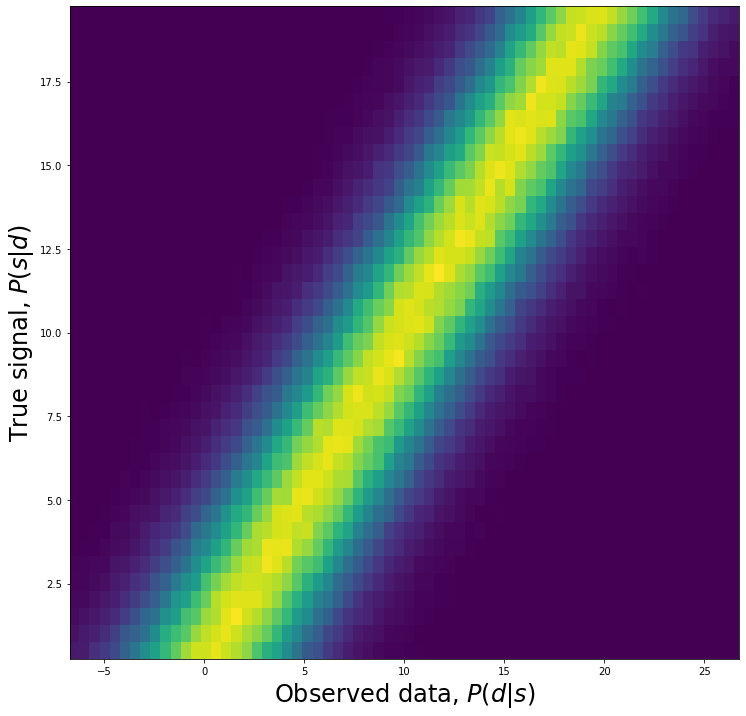

In [29]:
data = background + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

## Problem 1b
Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

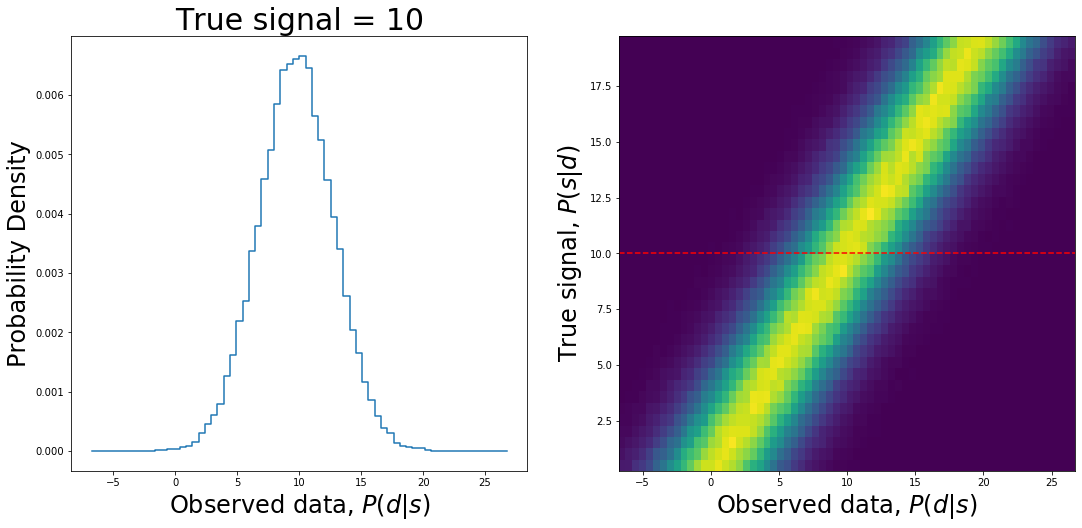

In [30]:
for i in range(len(signalcenters)):
    if signalcenters[i] == 10:
        tis = i

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].set_title('True signal = 10', fontsize = 30)
ax[0].set_ylabel('Probability Density', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].step(datacenters, Psd.transpose()[tis])
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[1].hlines(signalcenters[tis], datacenters.min(), datacenters.max(), linestyle = '--', color = 'r');

I am taking a horizontal slice through the data at true signal = 10. My zero-mean Gaussian background does not mess with the mean of the observed data, as can be seen from the graph.

## Problem 1c
Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

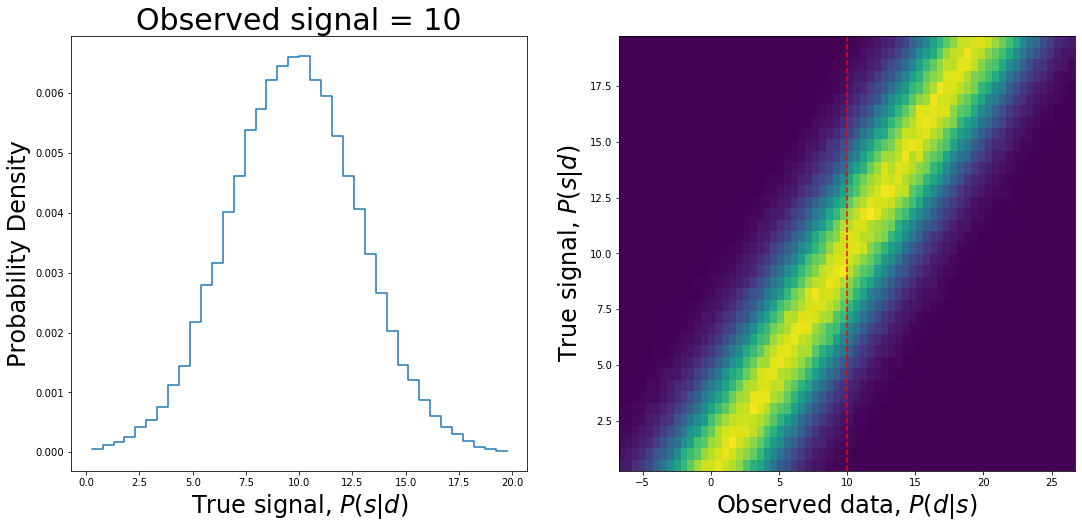

In [31]:
for i in range(len(signalcenters)):
    if datacenters[i] == 10:
        obs_val = i

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].set_title('Observed signal = 10', fontsize = 30)
ax[0].set_ylabel('Probability Density', fontsize = 24)
ax[0].set_xlabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].step(signalcenters, Psd[obs_val])
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[1].vlines(datacenters[obs_val], signalcenters.min(), signalcenters.max(), linestyle = '--', color = 'r');

Here, we are taking a vertical slice through the data at observed signal = 10.

## Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Gaussian distribution but with a non-zero mean. [Hint: move it by at least a couple of  𝜎 ]. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

In [32]:
background2 = stats.norm.rvs(loc=10, scale=3, size=1000000)
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000)

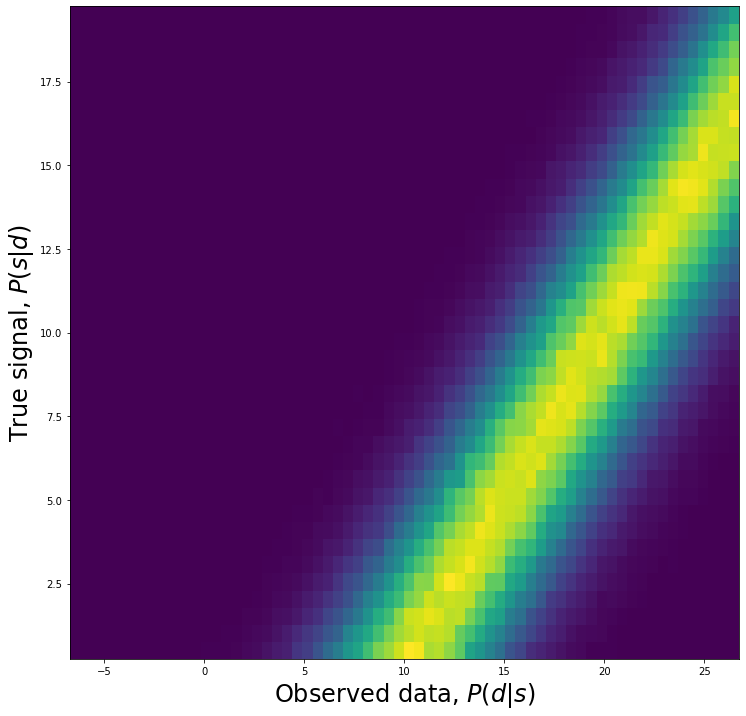

In [33]:
data2 = background2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp3, temp4= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

## Problem 2b

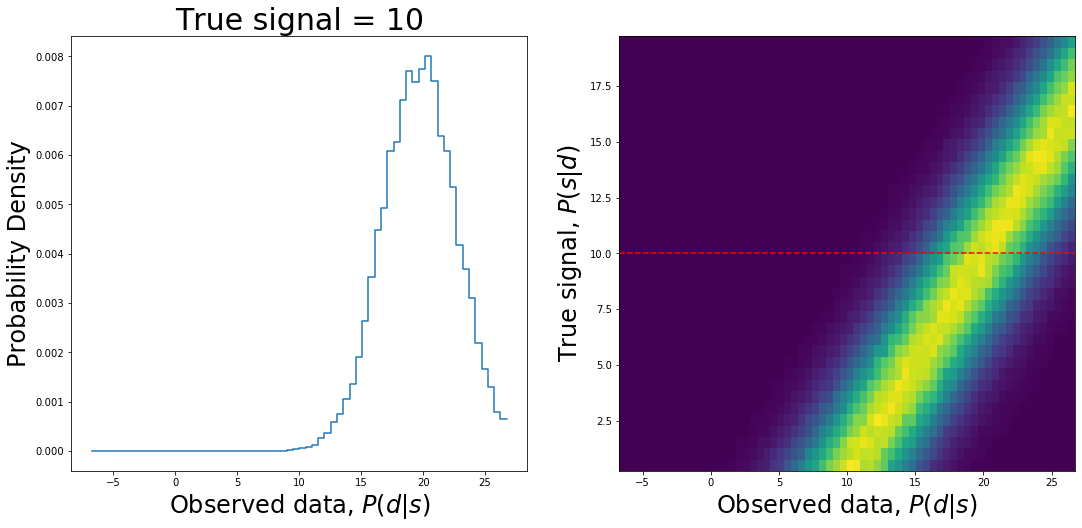

In [34]:
for i in range(len(signalcenters2)):
    if signalcenters2[i] == 10:
        tis2 = i

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].set_title('True signal = 10', fontsize = 30)
ax[0].set_ylabel('Probability Density', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].step(datacenters2, Psd2.transpose()[tis2])
ax[1].pcolormesh(datacenters2,signalcenters2,Psd2.T)
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[1].hlines(signalcenters2[tis2], datacenters2.min(), datacenters2.max(), linestyle = '--', color = 'r');

I am taking a horizontal slice through the data at true signal = 10. My non-zero-mean Gaussian background moves the mean of the observed data 10 to the right, as can be seen from the graph.

## Problem 2c
Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

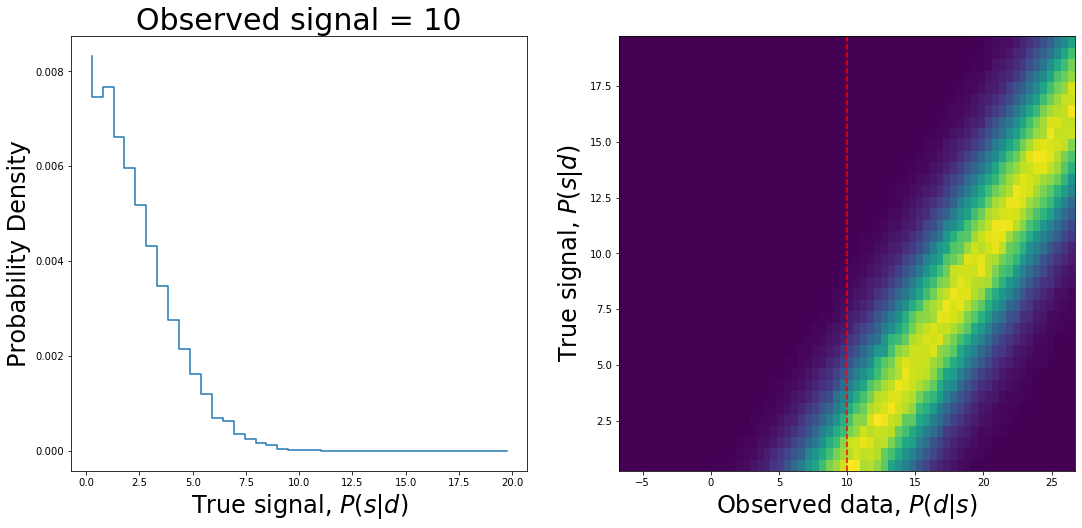

In [35]:
for i in range(len(signalcenters2)):
    if datacenters2[i] == 10:
        obs_val2 = i

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].set_title('Observed signal = 10', fontsize = 30)
ax[0].set_ylabel('Probability Density', fontsize = 24)
ax[0].set_xlabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].step(signalcenters2, Psd2[obs_val])
ax[1].pcolormesh(datacenters2,signalcenters2,Psd2.T)
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[1].vlines(datacenters2[obs_val], signalcenters2.min(), signalcenters2.max(), linestyle = '--', color = 'r');

Here, we are taking a vertical slice through the data at observed signal = 10, and the highest probability is right at 10, and it decreases all the time.

## Overplots

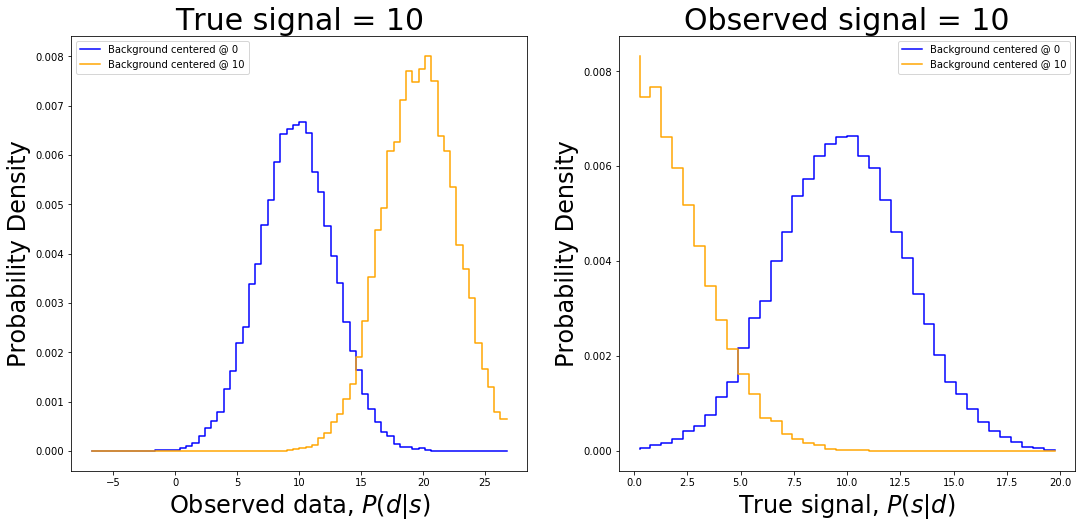

In [36]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

ax[0].set_title('True signal = 10', fontsize = 30)
ax[0].set_ylabel('Probability Density', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].step(datacenters, Psd.transpose()[tis], color = 'blue', label = 'Background centered @ 0')
ax[0].step(datacenters2, Psd2.transpose()[tis2], color = 'orange', label = 'Background centered @ 10')
ax[0].legend(loc=0)

ax[1].set_title('Observed signal = 10', fontsize = 30)
ax[1].set_ylabel('Probability Density', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[1].step(signalcenters, Psd[obs_val], color = 'blue', label = 'Background centered @ 0')
ax[1].set_ylabel('Probability Density', fontsize = 24)
ax[1].set_xlabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].step(signalcenters2, Psd2[obs_val2], color = 'orange', label = 'Background centered @ 10')
ax[1].legend(loc=0);